In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file_path = '../data/NG1_data.xlsx'
columns_to_read = 'B:G'
df_price = pd.read_excel(file_path, sheet_name='fullHistory', skiprows=3, usecols=columns_to_read)
df_price.rename(columns={df_price.columns[0]: "Dates"}, inplace=True)
df_price = df_price.drop(index=0).reset_index(drop=True)
df_price.head()

,Dates,NG1 Comdty,NG2 Comdty,NG3 Comdty,NG4 Comdty,NG6 Comdty
0,2004-11-01 00:00:00,2183.719,4642.824,1554.613,209.742,59.307
1,2004-11-02 00:00:00,2145.403,4568.689,1532.367,206.695,58.85
2,2004-11-03 00:00:00,2191.732,4645.295,1558.733,210.211,59.481
3,2004-11-04 00:00:00,2053.246,4398.178,1479.635,201.774,58.725
4,2004-11-05 00:00:00,1991.892,4215.312,1413.719,193.102,57.313


In [13]:
spreads = {}
columns = df_price.columns[1:]  # Skip the Dates column
# for i, col1 in enumerate(columns):
i = 0
col1 = 'NG1 Comdty'
for col2 in columns[i+1:]:
    spread_name = f"Carry {col1} - {col2}"
    spreads[spread_name] = df_price[col1] - df_price[col2]

# Add spreads to DataFrame
df_spreads = df_price[['Dates']].copy()
for spread_name, spread_values in spreads.items():
    df_spreads[spread_name] = spread_values
df_spreads.set_index('Dates', inplace=True)
df_spreads.head()

,Carry NG1 Comdty - NG2 Comdty,Carry NG1 Comdty - NG3 Comdty,Carry NG1 Comdty - NG4 Comdty,Carry NG1 Comdty - NG6 Comdty
Dates,,,,
2004-11-01,-2459.105,629.106,1973.977,2124.412
2004-11-02,-2423.286,613.036,1938.708,2086.553
2004-11-03,-2453.563,632.999,1981.521,2132.251
2004-11-04,-2344.932,573.611,1851.472,1994.521
2004-11-05,-2223.42,578.173,1798.79,1934.579


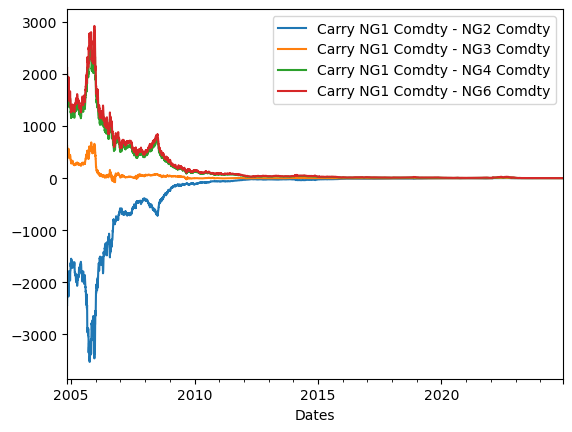

In [14]:
df_spreads.plot();

In [15]:
df_spreads_ma = df_spreads.rolling(window=20, min_periods=1).mean()
df_spreads_ma.head()

,Carry NG1 Comdty - NG2 Comdty,Carry NG1 Comdty - NG3 Comdty,Carry NG1 Comdty - NG4 Comdty,Carry NG1 Comdty - NG6 Comdty
Dates,,,,
2004-11-01,-2459.1050,629.106,1973.977000,2124.412000
2004-11-02,-2441.1955,621.071,1956.342500,2105.482500
2004-11-03,-2445.3180,625.047,1964.735333,2114.405333
2004-11-04,-2420.2215,612.188,1936.419500,2084.434250
2004-11-05,-2380.8612,605.385,1908.893600,2054.463200


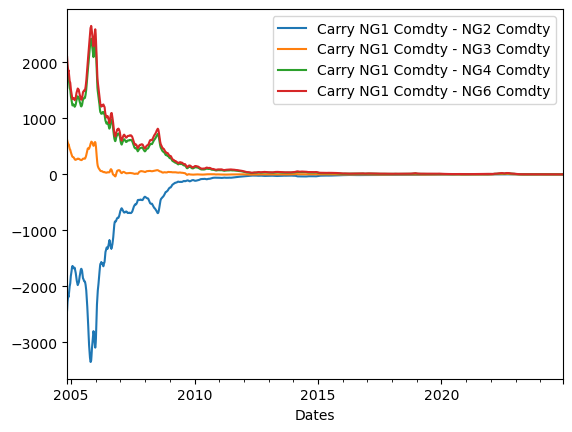

In [16]:
df_spreads_ma.plot();

In [17]:
df_adjusted = df_spreads - df_spreads_ma
df_adjusted.head()

,Carry NG1 Comdty - NG2 Comdty,Carry NG1 Comdty - NG3 Comdty,Carry NG1 Comdty - NG4 Comdty,Carry NG1 Comdty - NG6 Comdty
Dates,,,,
2004-11-01,0.0,0.0,0.0,0.0
2004-11-02,17.9095,-8.035,-17.6345,-18.9295
2004-11-03,-8.245,7.952,16.785667,17.845667
2004-11-04,75.2895,-38.577,-84.9475,-89.91325
2004-11-05,157.4412,-27.212,-110.1036,-119.8842


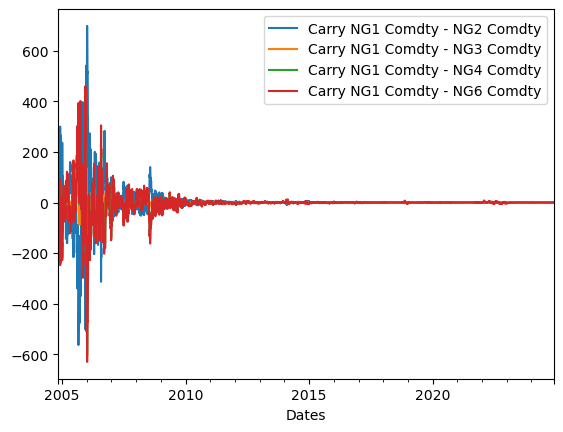

In [18]:
df_adjusted.plot();

In [ ]:
file_path = "../data/carry1_data.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df_spreads.to_excel(writer, sheet_name="carry1", index=True)
    df_spreads_ma.to_excel(writer, sheet_name="carry1_ma", index=True)
    df_adjusted.to_excel(writer, sheet_name="carry1_adj", index=True)

In [20]:
spreads = {}
columns = df_price.columns[1:]  # Skip the Dates column
# for i, col1 in enumerate(columns):
i = 0
col1 = 'NG1 Comdty'
for col2 in columns[i+1:]:
    spread_name = f"Carry {col1} - {col2}"
    spreads[spread_name] = (df_price[col1]/df_price[col2] - 1) / (int(col2[2])-int(col1[2]))

# Add spreads to DataFrame
df_spreads = df_price[['Dates']].copy()
for spread_name, spread_values in spreads.items():
    df_spreads[spread_name] = spread_values
df_spreads.set_index('Dates', inplace=True)
df_spreads.head()

,Carry NG1 Comdty - NG2 Comdty,Carry NG1 Comdty - NG3 Comdty,Carry NG1 Comdty - NG4 Comdty,Carry NG1 Comdty - NG6 Comdty
Dates,,,,
2004-11-01,-0.529657,0.202335,3.137151,7.164119
2004-11-02,-0.530412,0.200029,3.12652,7.091089
2004-11-03,-0.528182,0.203049,3.142114,7.16952
2004-11-04,-0.53316,0.193835,3.058656,6.792749
2004-11-05,-0.527463,0.204487,3.105077,6.750926


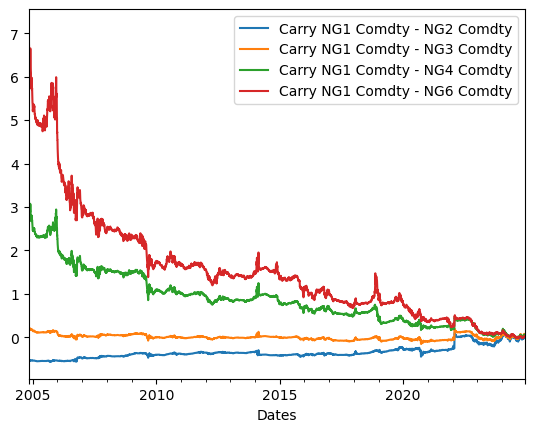

In [21]:
df_spreads.plot();

In [22]:
df_spreads_ma = df_spreads.rolling(window=20, min_periods=1).mean()
df_spreads_ma.head()

,Carry NG1 Comdty - NG2 Comdty,Carry NG1 Comdty - NG3 Comdty,Carry NG1 Comdty - NG4 Comdty,Carry NG1 Comdty - NG6 Comdty
Dates,,,,
2004-11-01,-0.529657,0.202335,3.137151,7.164119
2004-11-02,-0.530034,0.201182,3.131835,7.127604
2004-11-03,-0.529417,0.201805,3.135262,7.141576
2004-11-04,-0.530353,0.199812,3.116110,7.054369
2004-11-05,-0.529775,0.200747,3.113904,6.993681


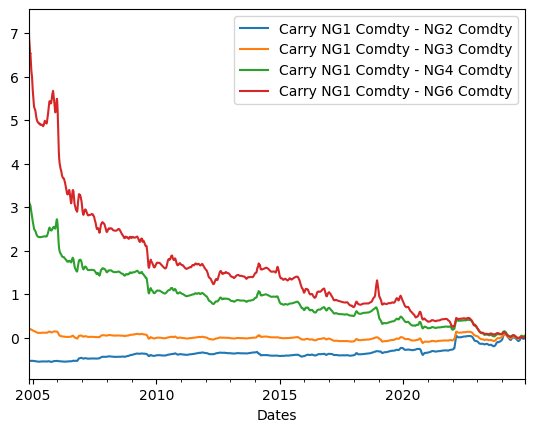

In [23]:
df_spreads_ma.plot();

In [24]:
df_adjusted = df_spreads - df_spreads_ma
df_adjusted.head()

,Carry NG1 Comdty - NG2 Comdty,Carry NG1 Comdty - NG3 Comdty,Carry NG1 Comdty - NG4 Comdty,Carry NG1 Comdty - NG6 Comdty
Dates,,,,
2004-11-01,0.0,0.0,0.0,0.0
2004-11-02,-0.000377,-0.001153,-0.005316,-0.036515
2004-11-03,0.001235,0.001245,0.006853,0.027944
2004-11-04,-0.002807,-0.005977,-0.057454,-0.26162
2004-11-05,0.002312,0.003739,-0.008826,-0.242755


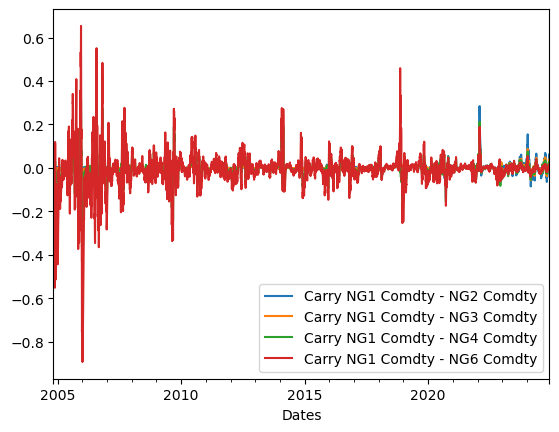

In [25]:
df_adjusted.plot();

In [ ]:
# file_path = "../data/carry2_data.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     df_spreads.to_excel(writer, sheet_name="carry2", index=True)
#     df_spreads_ma.to_excel(writer, sheet_name="carry2_ma", index=True)
#     df_adjusted.to_excel(writer, sheet_name="carry2_adj", index=True)